In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/evacv/Documents/bootcamp Data analysis/archive/amz_uk_price_prediction_dataset.csv")

In [ ]:
df.head (5)

In [ ]:
df.describe

In [ ]:
df.info

In [ ]:
df.columns

In [3]:
## Part 1: Understanding Product Categories
## 1. **Frequency Tables**:
## Generate a frequency table for the product `category`.
## Which are the top 5 most listed product categories?

category_freq = df['category'].value_counts()
category_freq

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [4]:
# Top 5 most listed product categories
top_5_categories = category_freq.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [5]:
## 2. **Visualizations**:
# Display the distribution of products across different categories using a bar chart. 
# *If you face problems understanding the chart, do it for a subset of top categories.

In [ ]:
plt.figure(figsize=(10, 6))
category_freq.plot(kind='bar', color='skyblue')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

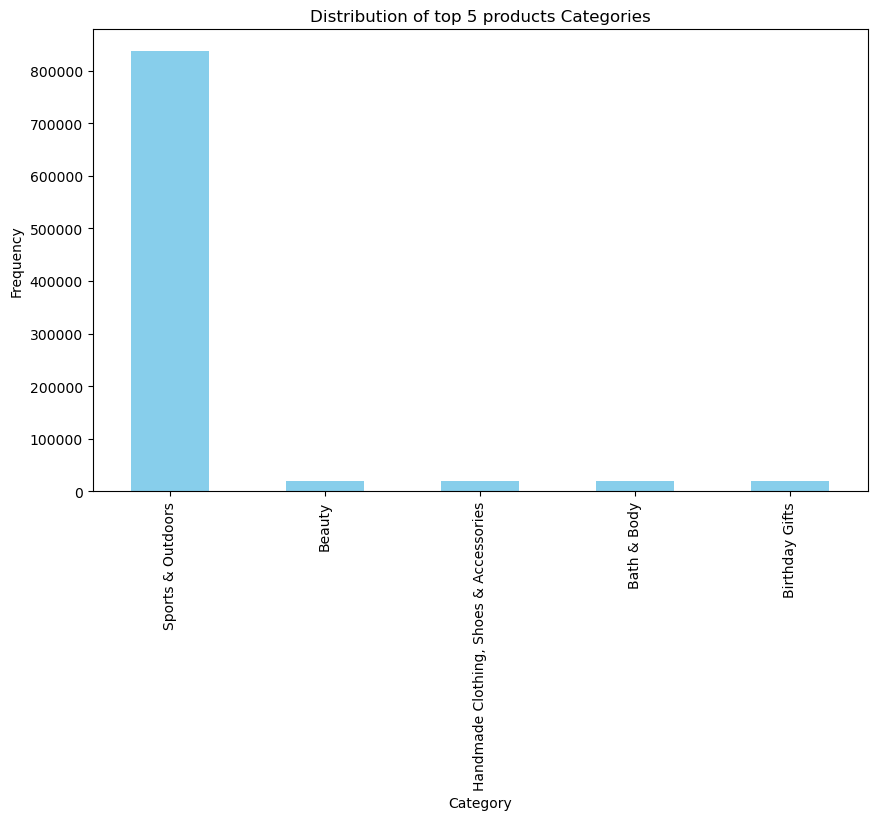

In [7]:
plt.figure(figsize=(10, 6))
top_5_categories.plot(kind='bar', color='skyblue')
plt.title('Distribution of top 5 products Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

([<matplotlib.patches.Wedge at 0x24199ec3b10>,
 [Text(-0.28666771368868316, -1.0619894641325325, 'Sports & Outdoors'),
  Text(0.4891716928879617, 0.985246697470804, 'Beauty'),
  Text(0.35457891731888064, 1.0412846831644893, 'Handmade Clothing, Shoes & Accessories'),
  Text(0.21457431617737968, 1.0788687885174035, 'Bath & Body'),
  Text(0.0717914226731242, 1.0976547688734235, 'Birthday Gifts')],
 [Text(-0.1563642074665544, -0.5792669804359267, '91.6%'),
  Text(0.2668209233934336, 0.5374072895295293, '2.1%'),
  Text(0.19340668217393486, 0.5679734635442668, '2.1%'),
  Text(0.11704053609675254, 0.5884738846458565, '2.1%'),
  Text(0.0391589578217041, 0.5987207830218674, '2.1%')])

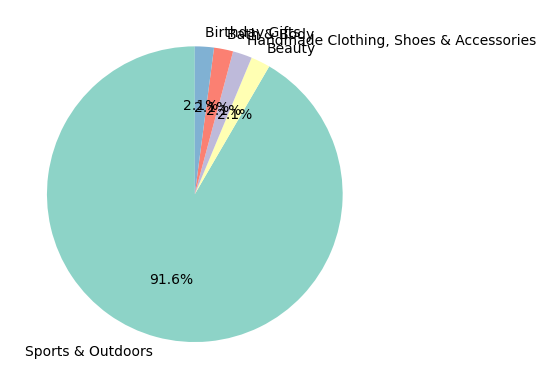

In [9]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

plt.pie(top_5_categories, labels=top_5_categories.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))


Sports & Outdoors category dominate the listing: 91.6%

In [10]:
### Part 2: Delving into Product Pricing
# 1. **Measures of Centrality**:
# Calculate the mean, median, and mode for the `price` of products.
# What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [11]:
mean_price = df['price'].mean()
print("Mean price:", mean_price)

Mean price: 89.24380943923663


In [12]:
median_price = df['price'].median()
print("Median price:", median_price)

Median price: 19.09


In [13]:
mode_price = df['price'].mode()
print("Mode price:", mode_price)

Mode price: 0    9.99
Name: price, dtype: float64


What's the average price point of products listed? How does this compare with the most common price point (mode)?
La moda es 9.99, lo que indica que este precio es el más común entre los productos de la lista. Sin embargo, el precio promedio es 89.24, lo que quiere decir que hay algunos productos con precios más altos que están afectando el promedio.

# 2. **Measures of Dispersion**:
# Determine the variance, standard deviation, range, and interquartile range for product `price`.
# How varied are the product prices? Are there any indicators of a significant spread in prices?

In [15]:
# Calcular la varianza

varianza = df['price'].var()
print("Varianza:", varianza)

Varianza: 119445.48532256528


In [16]:
# Calcular la desviación estándar
desviacion_estandar = df['price'].std()
print("Desviación estándar:", desviacion_estandar)

Desviación estándar: 345.60886175352226


In [17]:
# Calcular el rango
min_price = df['price'].min()
max_price = df['price'].max()
rango = max_price - min_price
print("Rango:", rango)


Rango: 100000.0


In [18]:
# Calcular el rango intercuartílico (IQR)
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

print("Rango intercuartílico (IQR):", quantiles_price)

Rango intercuartílico (IQR): 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64



Varianza: La varianza es bastante alta, lo que indica que los precios de los productos están bastante dispersos respecto a la media. Esto sugiere que hay una amplia variabilidad en los precios, con algunos productos que tienen precios significativamente diferentes de otros.
Desviación Estándar: La desviación estándar también es alta, lo que confirma la alta dispersión de los precios. Esto significa que los precios tienden a estar muy separados de la media, lo que puede indicar una amplia gama de precios entre los productos.
Rango: El rango es bastante grande, lo que indica una gran diferencia entre el precio máximo y el precio mínimo.
Rango Intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil. En este caso, el IQR es bastante bajo (alrededor de 36), lo que indica que la mayoría de los datos están agrupados en una pequeña gama de precios alrededor de 9.99 a 45.99. 

In [19]:
# 3. **Visualizations**:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
# *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=10, kde=True, color='skyblue')
plt.title('Distribución de Precios de Productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

En este caso, este histograma no nos da datos legibles. Esto se debe a que la gran mayoria de precios están en una franja basntante concreta de valores pero que tenemos precio muy altos que desvirtuan la gráfica. 

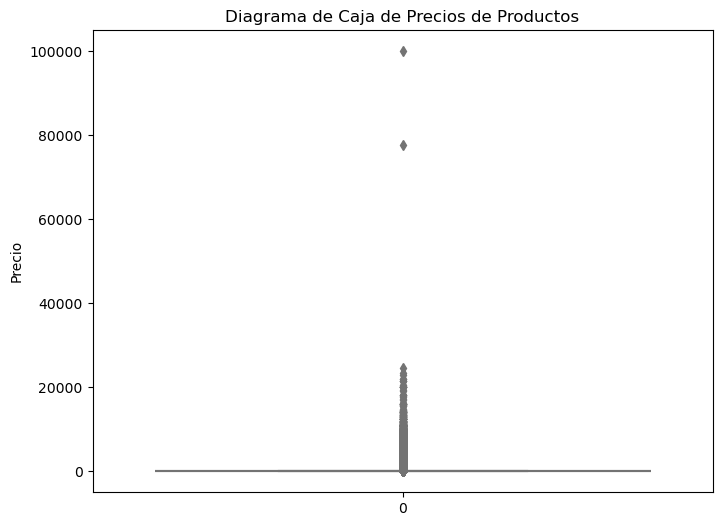

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['price'], color='lightgreen')
plt.title('Diagrama de Caja de Precios de Productos')
plt.ylabel('Precio')
plt.show()

In [22]:
### Part 3: Unpacking Product Ratings

## **Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# 1. **Measures of Centrality**:
# Calculate the mean, median, and mode for the `rating` of products.
# How do customers generally rate products? Is there a common trend?


mean_stars = df['stars'].mean()
print("Mean stars:", mean_stars)




Mean stars: 2.152836472966065


In [23]:

median_stars = df['stars'].median()
print("Median stars:", median_stars)


Median stars: 0.0


In [24]:
mode_stars= df['stars'].mode()
print("Mode stars:", mode_stars)

Mode stars: 0    0.0
Name: stars, dtype: float64


En este caso, habría que tener en cuenta si el 0 se percibe como una calificacion baja o si realmente es que la tendencia de los clientes es no valorar los productos. 

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [26]:
# Calcular la varianza

varianza_stars = df['stars'].var()
print("Varianza:", varianza_stars)

Varianza: 4.81743402976196


In [27]:
# Calcular la desviación estándar
desviacion_estandar_stars = df['stars'].std()
print("Desviación estándar:", desviacion_estandar_stars)

Desviación estándar: 2.1948653785054697


In [28]:
# Calcular el rango
min_price_stars = df['stars'].min()
max_price_stars = df['stars'].max()
rango = max_price_stars - min_price_stars
print("Rango:", rango)

Rango: 5.0


In [29]:
# Calcular el rango intercuartílico (IQR)
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

print("Rango intercuartílico (IQR):", quantiles_stars)

Rango intercuartílico (IQR): 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


Podemos decir que las calificaciones de los productos muestran una variación considerable. La alta varianza y desviación estándar sugieren que las calificaciones tienden a estar bastante dispersas alrededor de la media. Además, el rango intercuartílico de 4.4 indica que hay una variación sustancial en las calificaciones dentro del rango intercuartílico, lo que respalda la idea de que existe una amplia variación en las calificaciones de los clientes.

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [30]:
skewness_stars = df['stars'].skew()
skewness_stars

     #   Are the ratings normally distributed, or do they lean towards higher or lower values?


0.08120735761080985

In [31]:
kurtosis_stars = df['stars'].kurtosis()
kurtosis_stars

-1.9260061280432985

Are the ratings normally distributed, or do they lean towards higher or lower values?
The values indicate that the distribution of product ratings tends to be slightly right-skewed and less peaked than a normal distribution.

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

c:\Users\evacv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

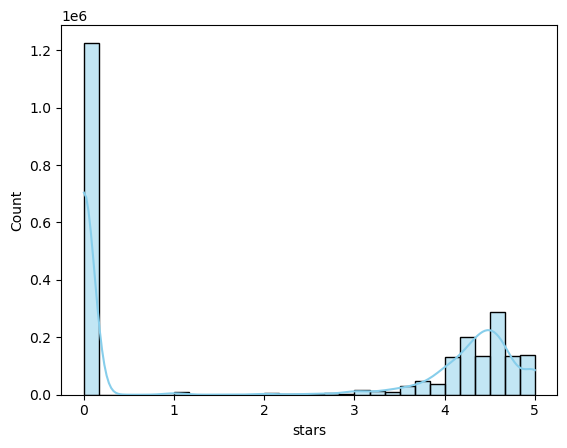

In [32]:
sns.histplot(df['stars'], kde=True, bins=30, color="skyblue")

La calificación más común es 0 y tenemos que tener en cuenta que es posible que no se refiera a productos valorados mal, si no que haya muchos usuarios que no valoren los productos, pero podemos ver, por otro lado, que cuando el usuario califica, la calificación común se mueve entre 4 y 5, siendo 5 la calificación más alta.